In [13]:
from imports import plt, np, pd, rfft, rfftfreq, irfft, lombscargle, TimeSeriesSplit, tf, sns
import data_processing

In [14]:
sunspots = data_processing.read_data()
sunspots

,Greg_Year,Month,Dec_Year,N_total_sunspots_smoothed,Montly_mean_sunspot_number_std,N_obs,Marker
0,1749,1,1749.042,96.7,-1.0,-1,1
1,1749,2,1749.123,104.3,-1.0,-1,1
2,1749,3,1749.204,116.7,-1.0,-1,1
3,1749,4,1749.288,92.8,-1.0,-1,1
4,1749,5,1749.371,141.7,-1.0,-1,1
...,...,...,...,...,...,...,...
3297,2023,10,2023.790,99.4,16.0,958,0
3298,2023,11,2023.873,105.4,16.7,809,0
3299,2023,12,2023.958,114.2,17.9,619,0
3300,2024,1,2024.042,123.0,18.7,783,0


[Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Number of sunspots'),
 Text(0.5, 1.0, 'Monthly averaged number of sunspots')]

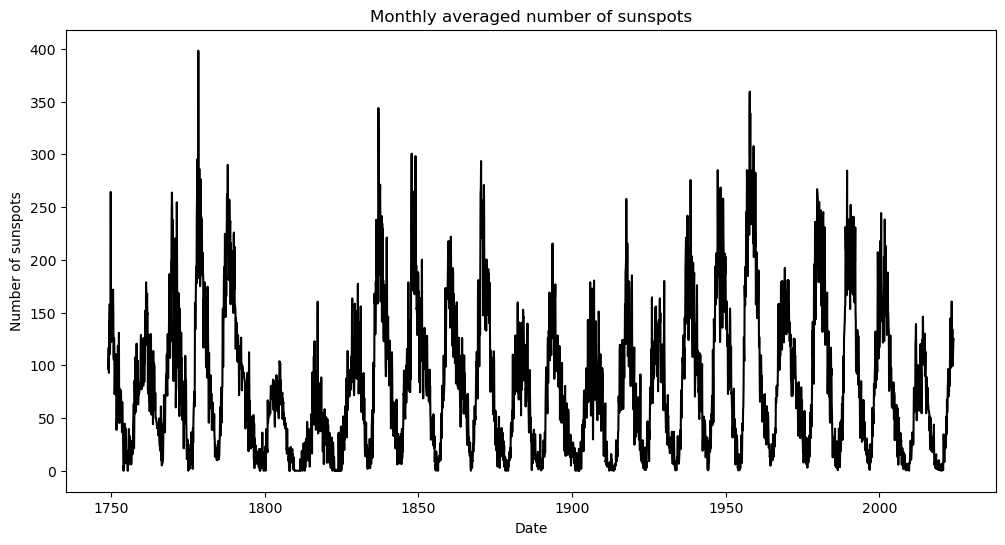

In [15]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(sunspots['Dec_Year'], sunspots['N_total_sunspots_smoothed'], 'k-')
ax.set(
    xlabel='Date',
    ylabel='Number of sunspots',
    title='Monthly averaged number of sunspots',
)

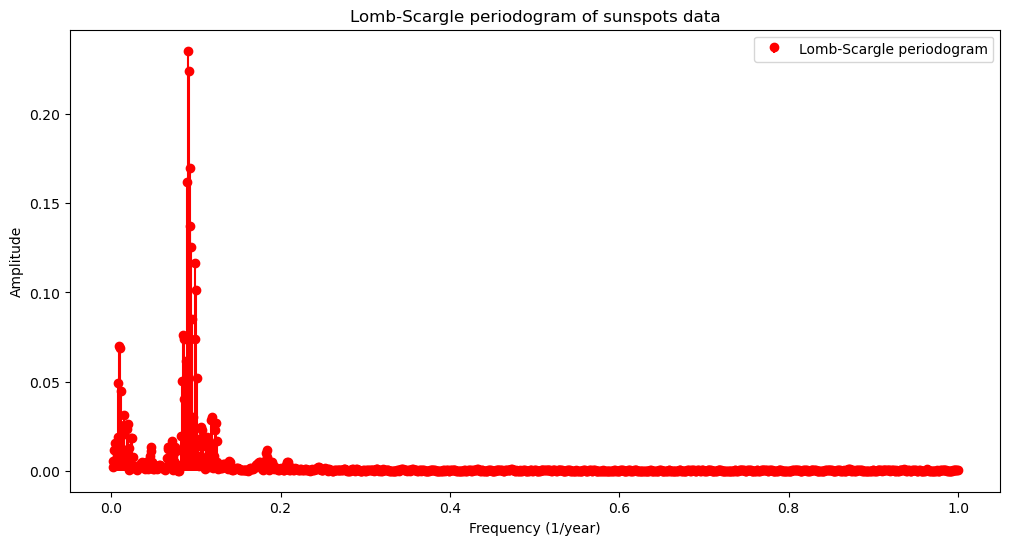

In [16]:
freq_periodogram = np.linspace(0.01, 2*np.pi, 1000)
periodogram = lombscargle(sunspots['Dec_Year']-sunspots['Dec_Year'].iloc[0], 
                    sunspots['N_total_sunspots_smoothed']-np.mean(sunspots['N_total_sunspots_smoothed']), 
                    freq_periodogram, normalize=True)

fig, ax = plt.subplots(figsize=(12, 6))

ax.stem(freq_periodogram/(2*np.pi), periodogram, 'r', label='Lomb-Scargle periodogram', basefmt="none")
ax.set(
    xlabel='Frequency (1/year)',
    ylabel='Amplitude',
    title='Lomb-Scargle periodogram of sunspots data',
)
plt.legend()

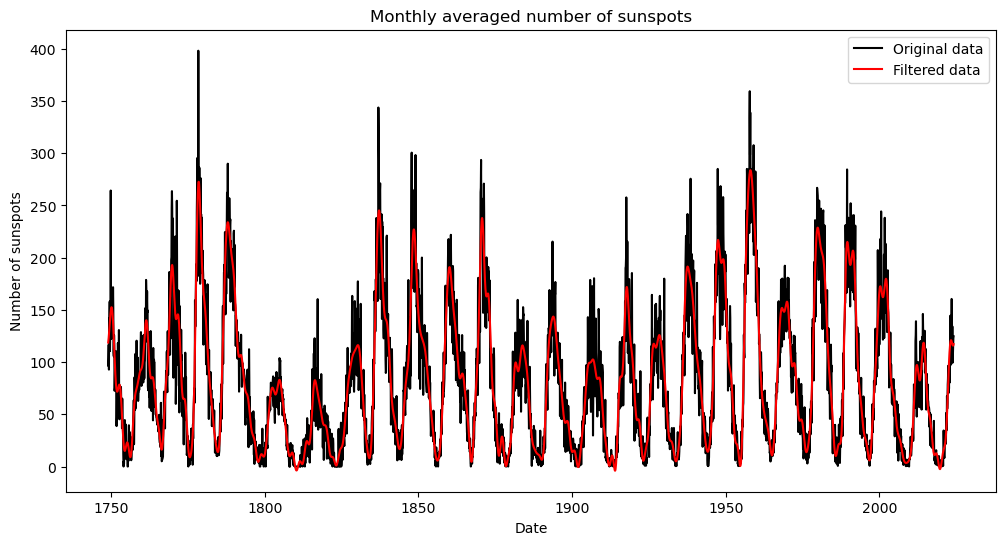

In [17]:
sunspots_filtered = data_processing.filter_data(df = sunspots, treshold = 0.5, x = 'Dec_Year', y = 'N_total_sunspots_smoothed')

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(sunspots['Dec_Year'], sunspots['N_total_sunspots_smoothed'], 'k-', label='Original data')
ax.plot(sunspots['Dec_Year'], sunspots_filtered, 'r-', label='Filtered data')
ax.set(
    xlabel='Date',
    ylabel='Number of sunspots',
    title='Monthly averaged number of sunspots',
)
plt.legend()

In [18]:
sunspots['N_total_sunspots_smoothed'] = sunspots_filtered
sunspots = sunspots[['Dec_Year', 'N_total_sunspots_smoothed']]
num_features = sunspots.shape[1]

/home/lennart/Git Projekte/sunspot_data/scripts/data_processing.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['N_total_sunspots_smoothed'] = (train['N_total_sunspots_smoothed'] - mean) / std
/home/lennart/Git Projekte/sunspot_data/scripts/data_processing.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['N_total_sunspots_smoothed'] = (test['N_total_sunspots_smoothed'] - mean) / std


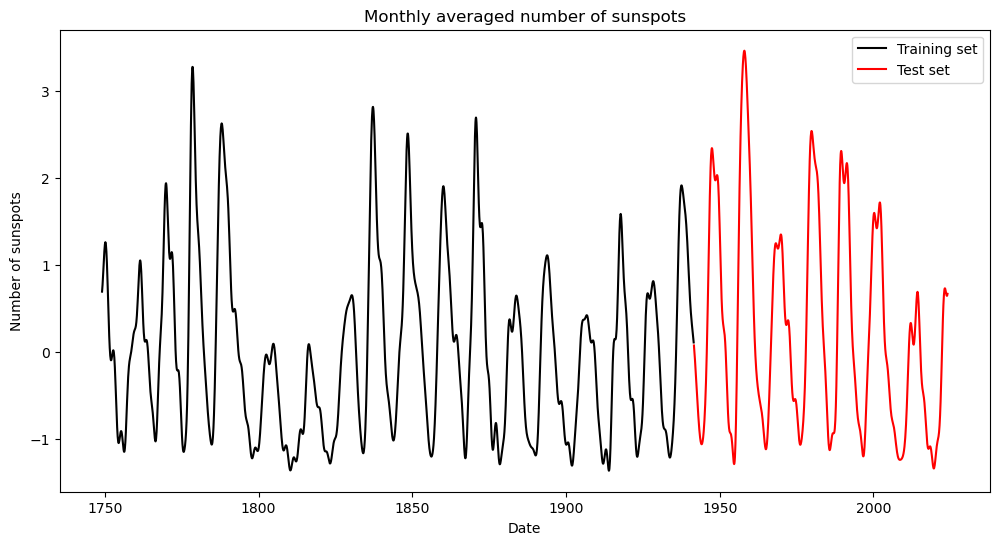

In [19]:
train_set, test_set = data_processing.split_data(sunspots)
train_set, test_set = data_processing.standardize_data(train_set, test_set)

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(train_set['Dec_Year'], train_set['N_total_sunspots_smoothed'], 'k-', label='Training set')
ax.plot(test_set['Dec_Year'], test_set['N_total_sunspots_smoothed'], 'r-', label='Test set')
ax.set(
    xlabel='Date',
    ylabel='Number of sunspots',
    title='Monthly averaged number of sunspots',
)
plt.legend()

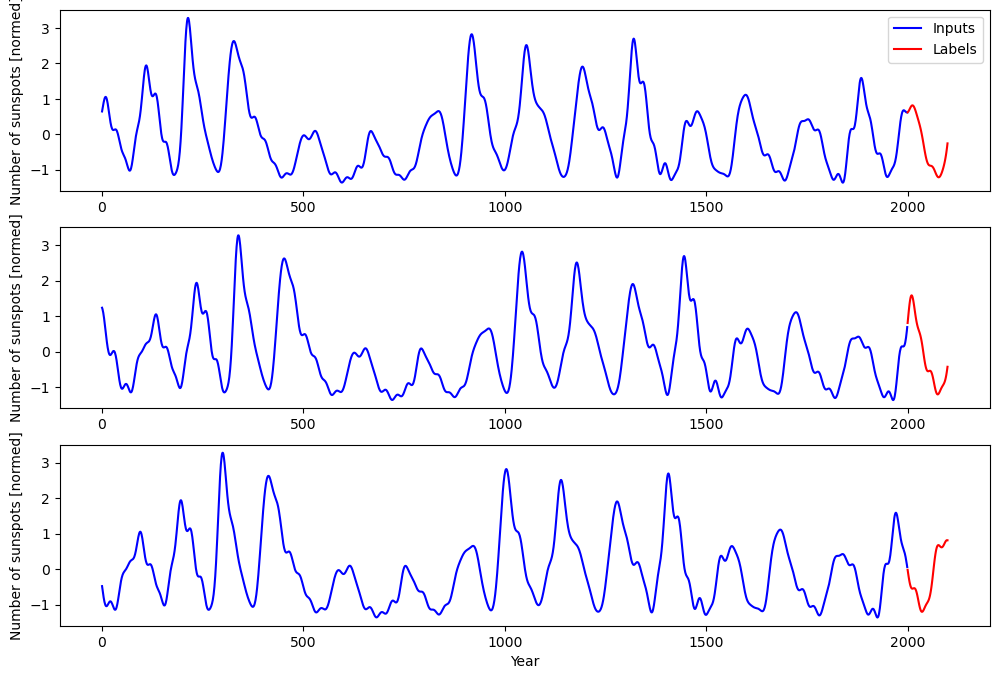

In [20]:
out_steps = 100

multi_window = data_processing.window_generator(input_width=2000, label_width=out_steps, shift=out_steps, train_df=train_set, test_df=test_set, label_columns=['N_total_sunspots_smoothed'])

window = tf.stack([np.array(train_set[:multi_window.total_window_size]), np.array(train_set[100:100+multi_window.total_window_size]), np.array(train_set[200:200+multi_window.total_window_size])])

inputs, labels = multi_window.split_window(window)

multi_window.plot()

Epoch 1/100
7/7 [==============================] - 0s 8ms/step - loss: 1.1322 - mse: 1.9122 - mae: 1.1322
Epoch 2/100
7/7 [==============================] - 0s 8ms/step - loss: 0.9495 - mse: 1.3286 - mae: 0.9495
Epoch 3/100
7/7 [==============================] - 0s 9ms/step - loss: 0.8862 - mse: 1.2328 - mae: 0.8862
Epoch 4/100
7/7 [==============================] - 0s 7ms/step - loss: 0.8151 - mse: 0.9436 - mae: 0.8151
Epoch 5/100
7/7 [==============================] - 0s 5ms/step - loss: 0.7930 - mse: 0.9560 - mae: 0.7930
Epoch 6/100
7/7 [==============================] - 0s 6ms/step - loss: 0.8043 - mse: 0.8910 - mae: 0.8043
Epoch 7/100
7/7 [==============================] - 0s 5ms/step - loss: 0.7599 - mse: 0.8174 - mae: 0.7599
Epoch 8/100
7/7 [==============================] - 0s 5ms/step - loss: 0.7670 - mse: 0.8195 - mae: 0.7670
Epoch 9/100
7/7 [==============================] - 0s 5ms/step - loss: 0.7575 - mse: 0.7915 - mae: 0.7575
Epoch 10/100
7/7 [============================

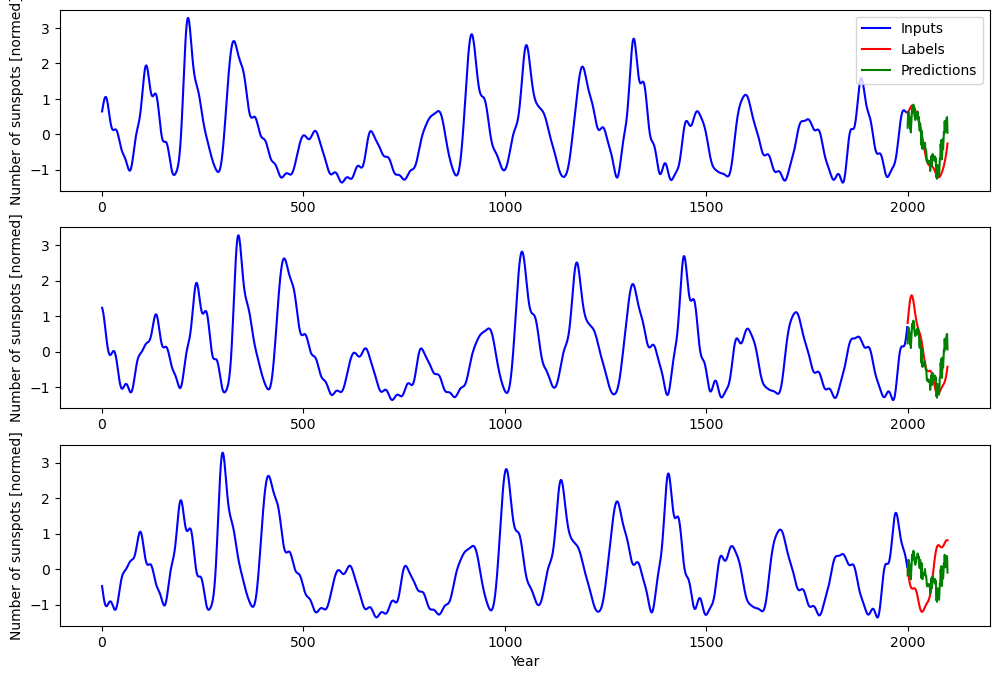

In [24]:
linear_model = data_processing.linear_model(outer_steps=out_steps)

history = data_processing.compile_and_fit(linear_model, multi_window, lr = 0.001, momentum = 0.9, patience=20)

multi_window.plot(linear_model)

Epoch 1/100
7/7 [==============================] - 1s 9ms/step - loss: 15.8556 - mse: 368.8048 - mae: 15.8556
Epoch 2/100
7/7 [==============================] - 0s 7ms/step - loss: 8.2276 - mse: 90.7455 - mae: 8.2276
Epoch 3/100
7/7 [==============================] - 0s 7ms/step - loss: 5.4183 - mse: 45.7981 - mae: 5.4183
Epoch 4/100
7/7 [==============================] - 0s 7ms/step - loss: 3.3250 - mse: 17.1194 - mae: 3.3250
Epoch 5/100
7/7 [==============================] - 0s 6ms/step - loss: 2.1916 - mse: 7.0854 - mae: 2.1916
Epoch 6/100
7/7 [==============================] - 0s 7ms/step - loss: 1.4566 - mse: 3.1576 - mae: 1.4566
Epoch 7/100
7/7 [==============================] - 0s 7ms/step - loss: 1.1402 - mse: 1.9996 - mae: 1.1402
Epoch 8/100
7/7 [==============================] - 0s 6ms/step - loss: 0.9610 - mse: 1.4029 - mae: 0.9610
Epoch 9/100
7/7 [==============================] - 0s 6ms/step - loss: 0.9137 - mse: 1.2584 - mae: 0.9137
Epoch 10/100
7/7 [=====================

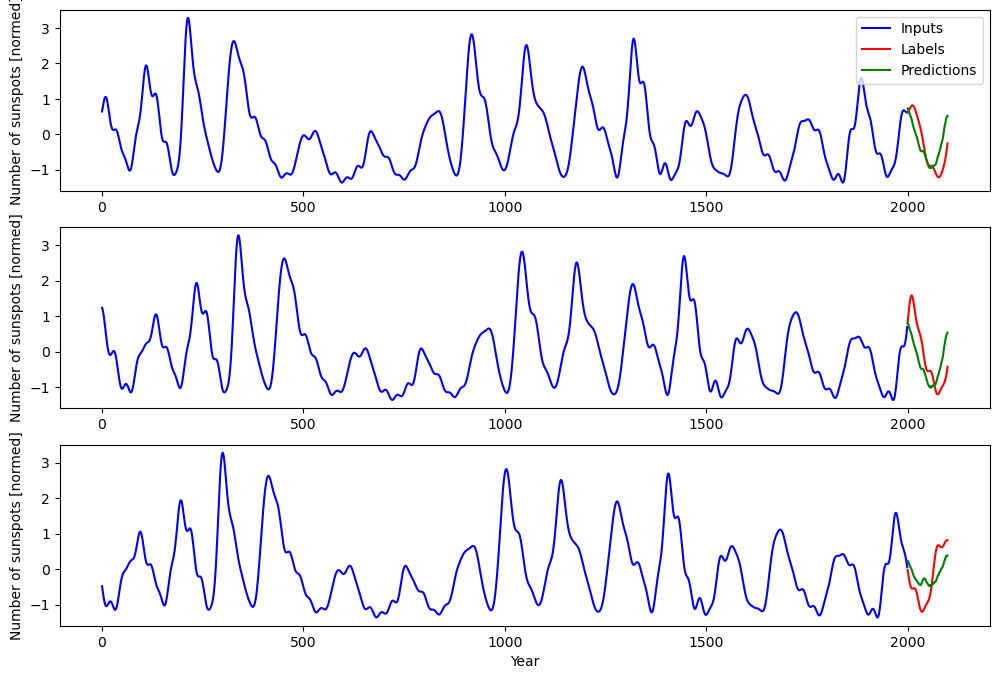

In [22]:
dense_model = data_processing.dense_model(outer_steps=out_steps)

history = data_processing.compile_and_fit(dense_model, multi_window, lr = 0.001, momentum = 0.9, patience=20)

multi_window.plot(dense_model)

Epoch 1/100
7/7 [==============================] - 29s 3s/step - loss: 0.7941 - mse: 0.8167 - mae: 0.7941
Epoch 2/100
7/7 [==============================] - 19s 3s/step - loss: 0.7828 - mse: 0.7852 - mae: 0.7828
Epoch 3/100
7/7 [==============================] - 19s 3s/step - loss: 0.7750 - mse: 0.7717 - mae: 0.7750
Epoch 4/100
7/7 [==============================] - 19s 3s/step - loss: 0.7710 - mse: 0.7736 - mae: 0.7710
Epoch 5/100
7/7 [==============================] - 18s 3s/step - loss: 0.7672 - mse: 0.7890 - mae: 0.7672
Epoch 6/100
7/7 [==============================] - 18s 3s/step - loss: 0.7663 - mse: 0.8173 - mae: 0.7663
Epoch 7/100
7/7 [==============================] - 19s 3s/step - loss: 0.7649 - mse: 0.8122 - mae: 0.7649
Epoch 8/100
7/7 [==============================] - 19s 3s/step - loss: 0.7644 - mse: 0.7965 - mae: 0.7644
Epoch 9/100
7/7 [==============================] - 19s 3s/step - loss: 0.7629 - mse: 0.7933 - mae: 0.7629
Epoch 10/100
7/7 [============================

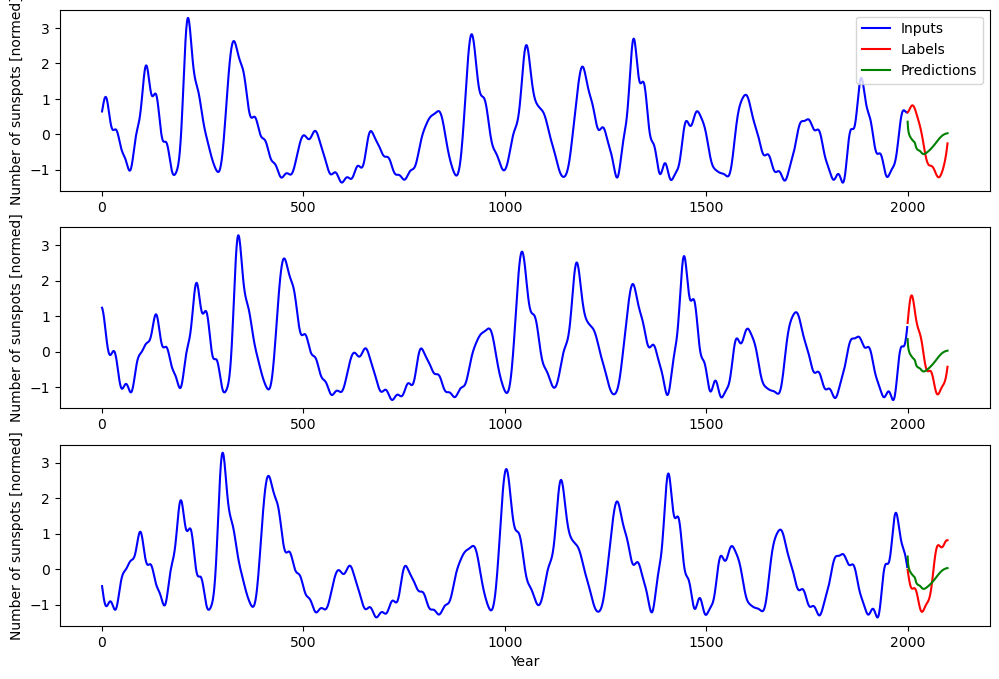

In [25]:
feedback_model = data_processing.FeedBack(units=32, out_steps=out_steps)

history = data_processing.compile_and_fit(feedback_model, multi_window, lr = 0.001, momentum = 0.9, patience=2)

multi_window.plot(feedback_model)